In [26]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow


Defaulting to user installation because normal site-packages is not writeable


In [27]:
# importing libraries
import numpy as np
import os
import pandas as pd
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image


In [28]:
# dictionary to map the names of the celebrities to their respective labels
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

# various features related to the dataset
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}


In [29]:
# function to load the image
def load_image(path):
    im = Image.open(path).convert(
        'L' if opt['is_grayscale'] else 'RGB')  # returns the image
    im = im.resize((opt['image_size'], opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# function to display the images


def display_images(imgs, classes, row=1, col=2, w=32, h=32):
    fig = plt.figure(figsize=(8, 8))
    for i in range(1, col*row + 1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)

        if opt['is_grayscale']:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(img)

        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

# function to load the dataset


def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path, filename))
            y = filename.split('_')[0]
            y = label_dict[y]
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)  # images added to the list
    y_list = np.array(y_list)  # labels added to the list
    print("Dataset shape:", image_list.shape)
    print("Label shape:", y_list.shape)

    return image_list, y_list


In [30]:
# calling the load_data function
dirpath = './IIIT-CFW/IIIT-CFW'
X, y = load_data(dirpath)


Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


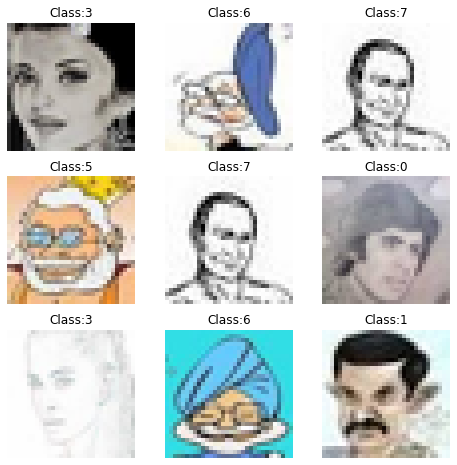

In [31]:
# displaying the images
N, H, W = X.shape[0:3]  # N: Number of images, H: Height, W: Width
C = 1 if opt['is_grayscale'] else X.shape[3]  # C: Number of channels

row = 3
col = 3
ind = np.random.randint(0, y.shape[0], row*col)  # Randomly select 6 images
# Display images in 2 rows and 3 columns
display_images(X[ind, ...], y[ind], row, col)


# 1.1 Part A

In [32]:
# Doing PCA for our dataset (1.1 Part A)

no_components = min(N, H*W*C) # Number of components
X_reshaped = X.reshape(N, H*W*C) # Reshaping the dataset
X_cov = np.cov(X_reshaped.T) # Calculating the covariance matrix

# Calculating the eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eigh(X_cov)
sorted_index = np.argsort(eig_vals)[::-1] # Sorting the eigen values in descending order
eig_vals = eig_vals[sorted_index]
eig_vecs = eig_vecs[:, sorted_index]

X_reduced_components = []
for i in range(no_components):
    t = np.dot(X_reshaped, eig_vecs[:, :i+1])
    X_reduced_components.append(t)
# The ith element of X_reduced_components contains the X_reshaped reduced to i+1 dimensions. 

pca_matrix = X_reduced_components[-1] # The last element of X_reduced_components contains the X_reshaped reduced to the minimum number of dimesions without losing any information.

# 1.1 Part B

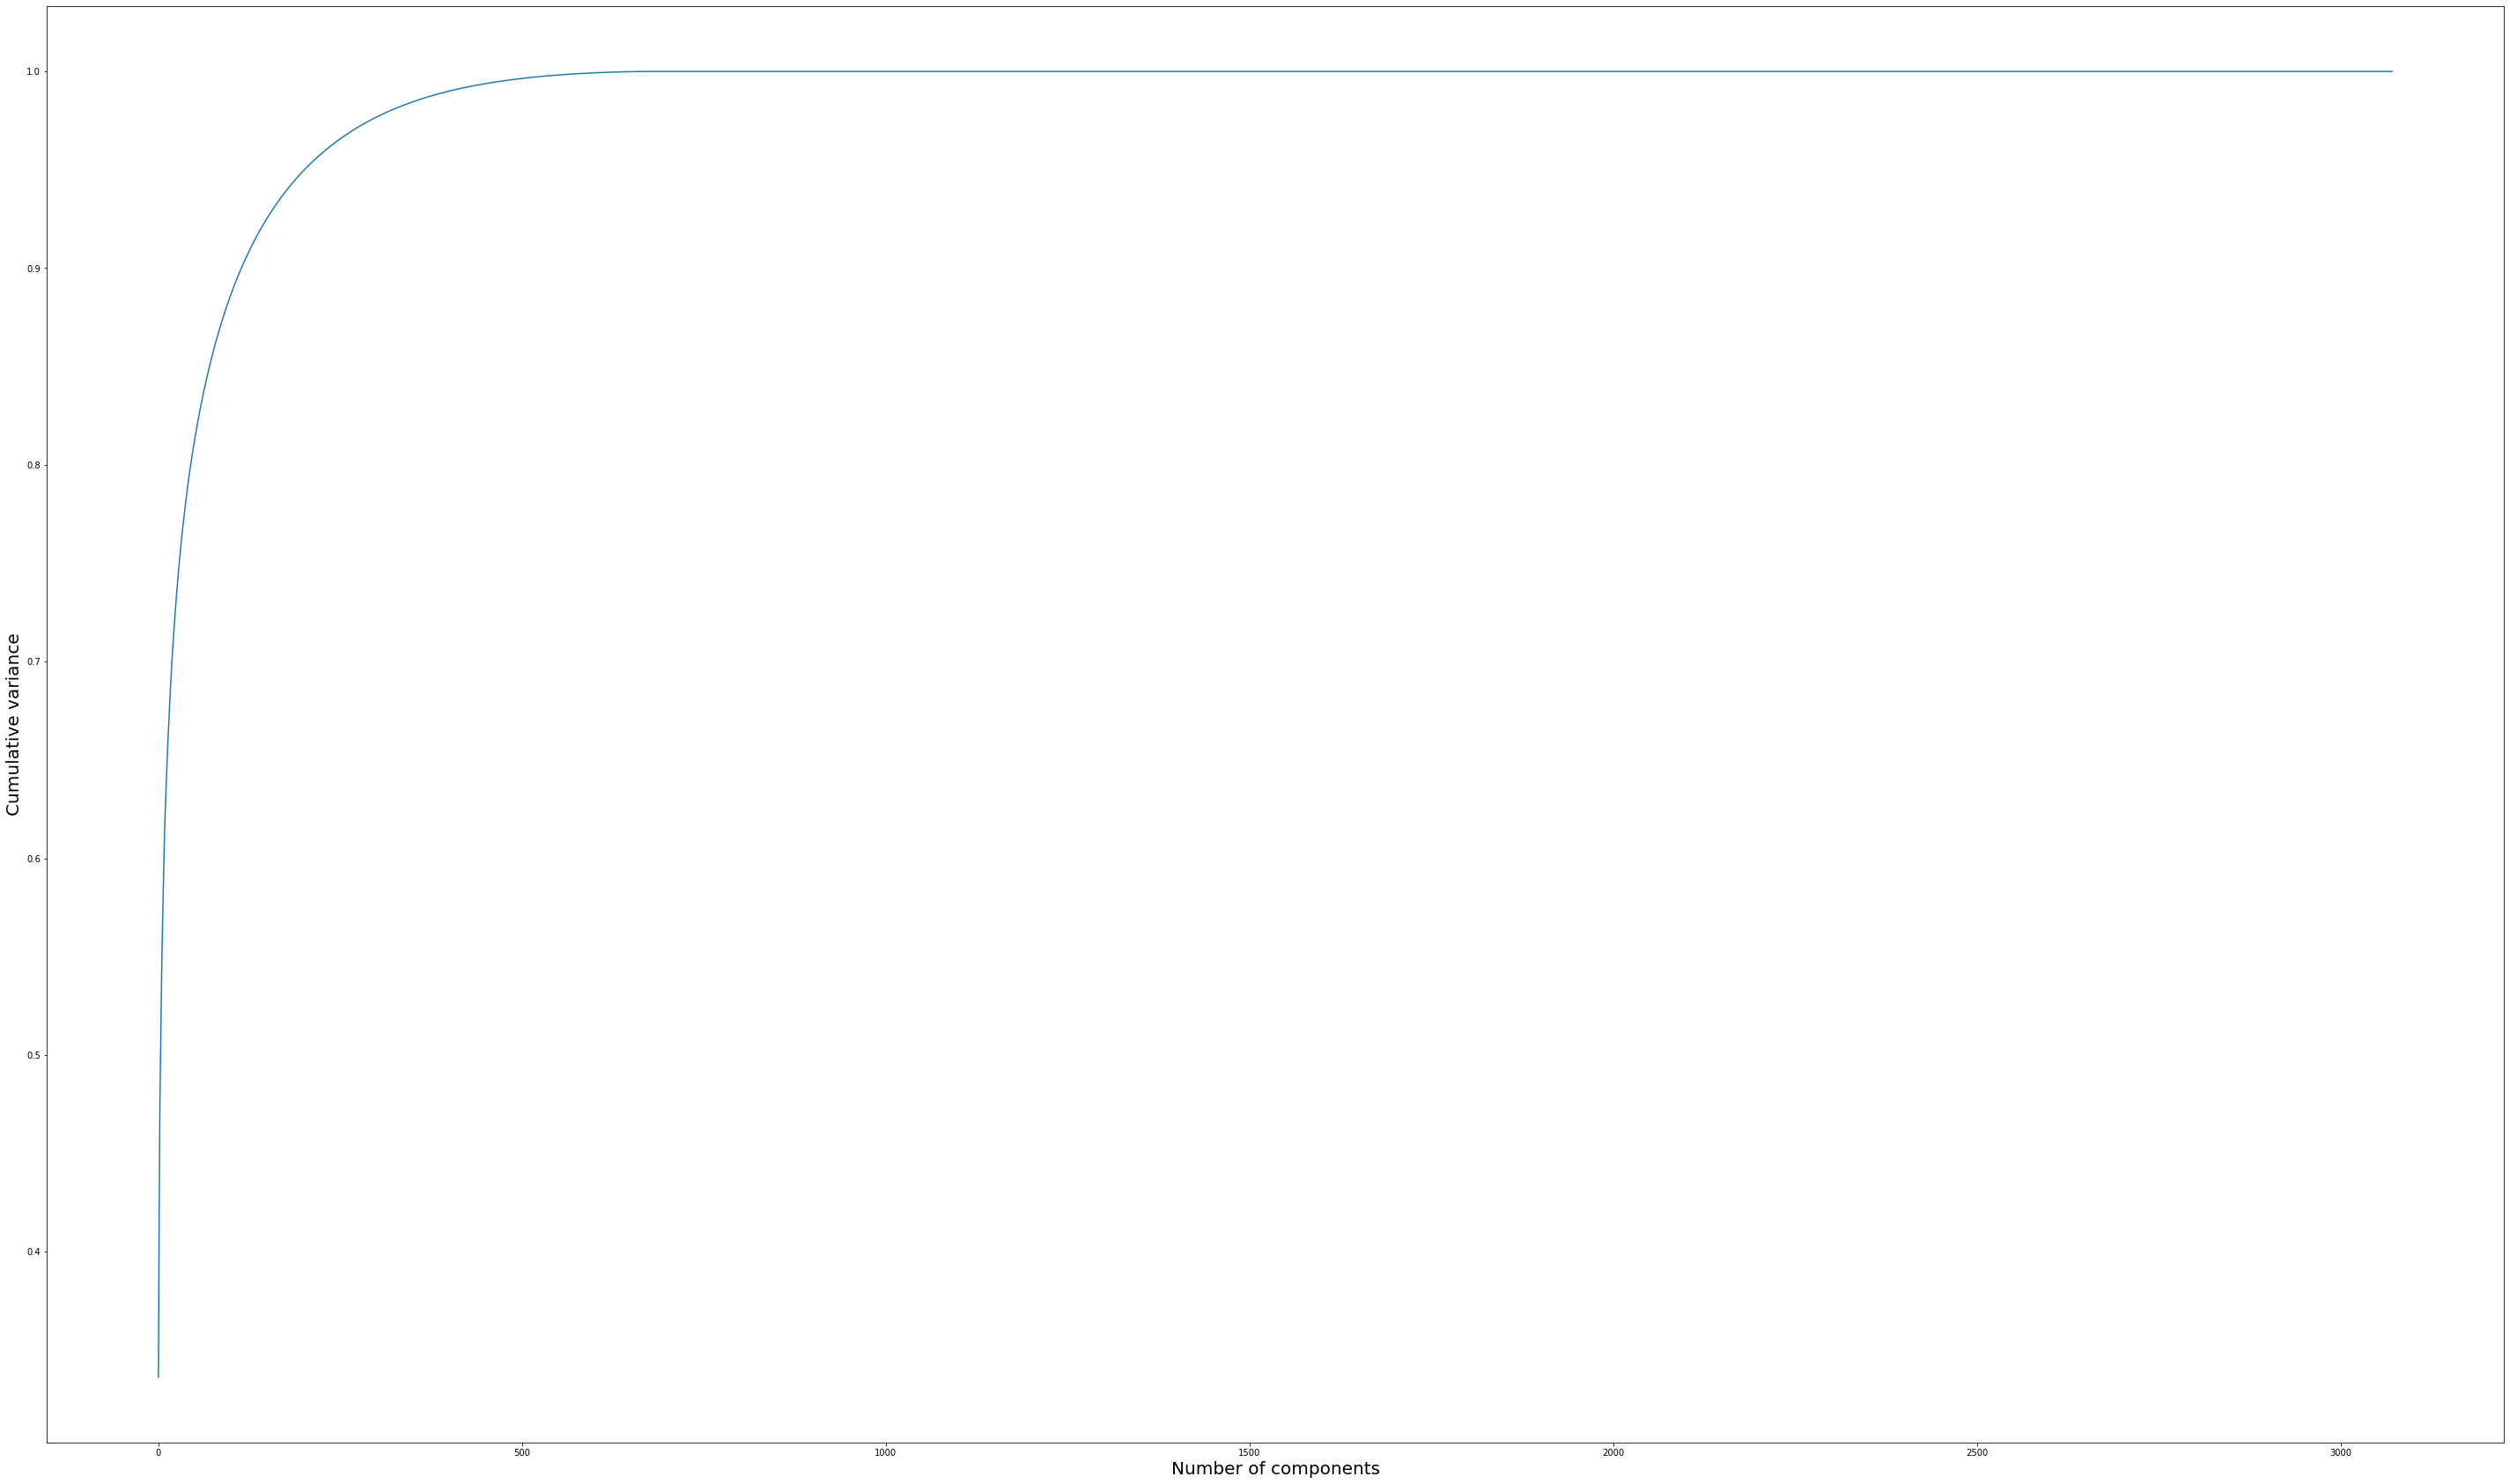

In [33]:
# 1.1 Part B
cumulative_variance = np.cumsum(eig_vals)/np.sum(eig_vals) # Calculating the cumulative variance
# Plotting the cumulative variance
plt.plot(cumulative_variance)
plt.xlabel('Number of components', fontsize=20) 
plt.ylabel('Cumulative variance', fontsize=20)
plt.rcParams["figure.figsize"] = (50,30) # increasing the size of the plot
plt.show()

# 1.1 Part C

In [34]:
# Assignment 1 Pictionary dataset
pictionary_dataset = np.load('./data (1).npy', allow_pickle=True) # Loading the dataset

resnet_features = []
vit_features = []
labels = []

for row in pictionary_dataset:
    resnet_features.append(row[1])
    vit_features.append(row[2])
    labels.append(row[3])

resnet_features = np.array(resnet_features).reshape(-1, 1024)
vit_features = np.array(vit_features).reshape(-1, 512)
labels = np.array(labels)



In [35]:
# Running the KNN classifier on the dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

def custom_KNN(X, y):

    # using train_test_split to split the dataset into train and test sets

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

    # using the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    # calculating the metrics of accuracy, precision, recall and f1-score
    y_pred = knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1score = f1_score(y_test, y_pred, average='macro', zero_division=0)
    return accuracy, precision, recall, f1score

Metrics without PCA on resnet features:
Accuracy: 0.16333333333333333
Precision: 0.11933278191342707
Recall: 0.12586789554531488
F1-score: 0.11075873946841688



Plotting metrics with PCA on resnet features:


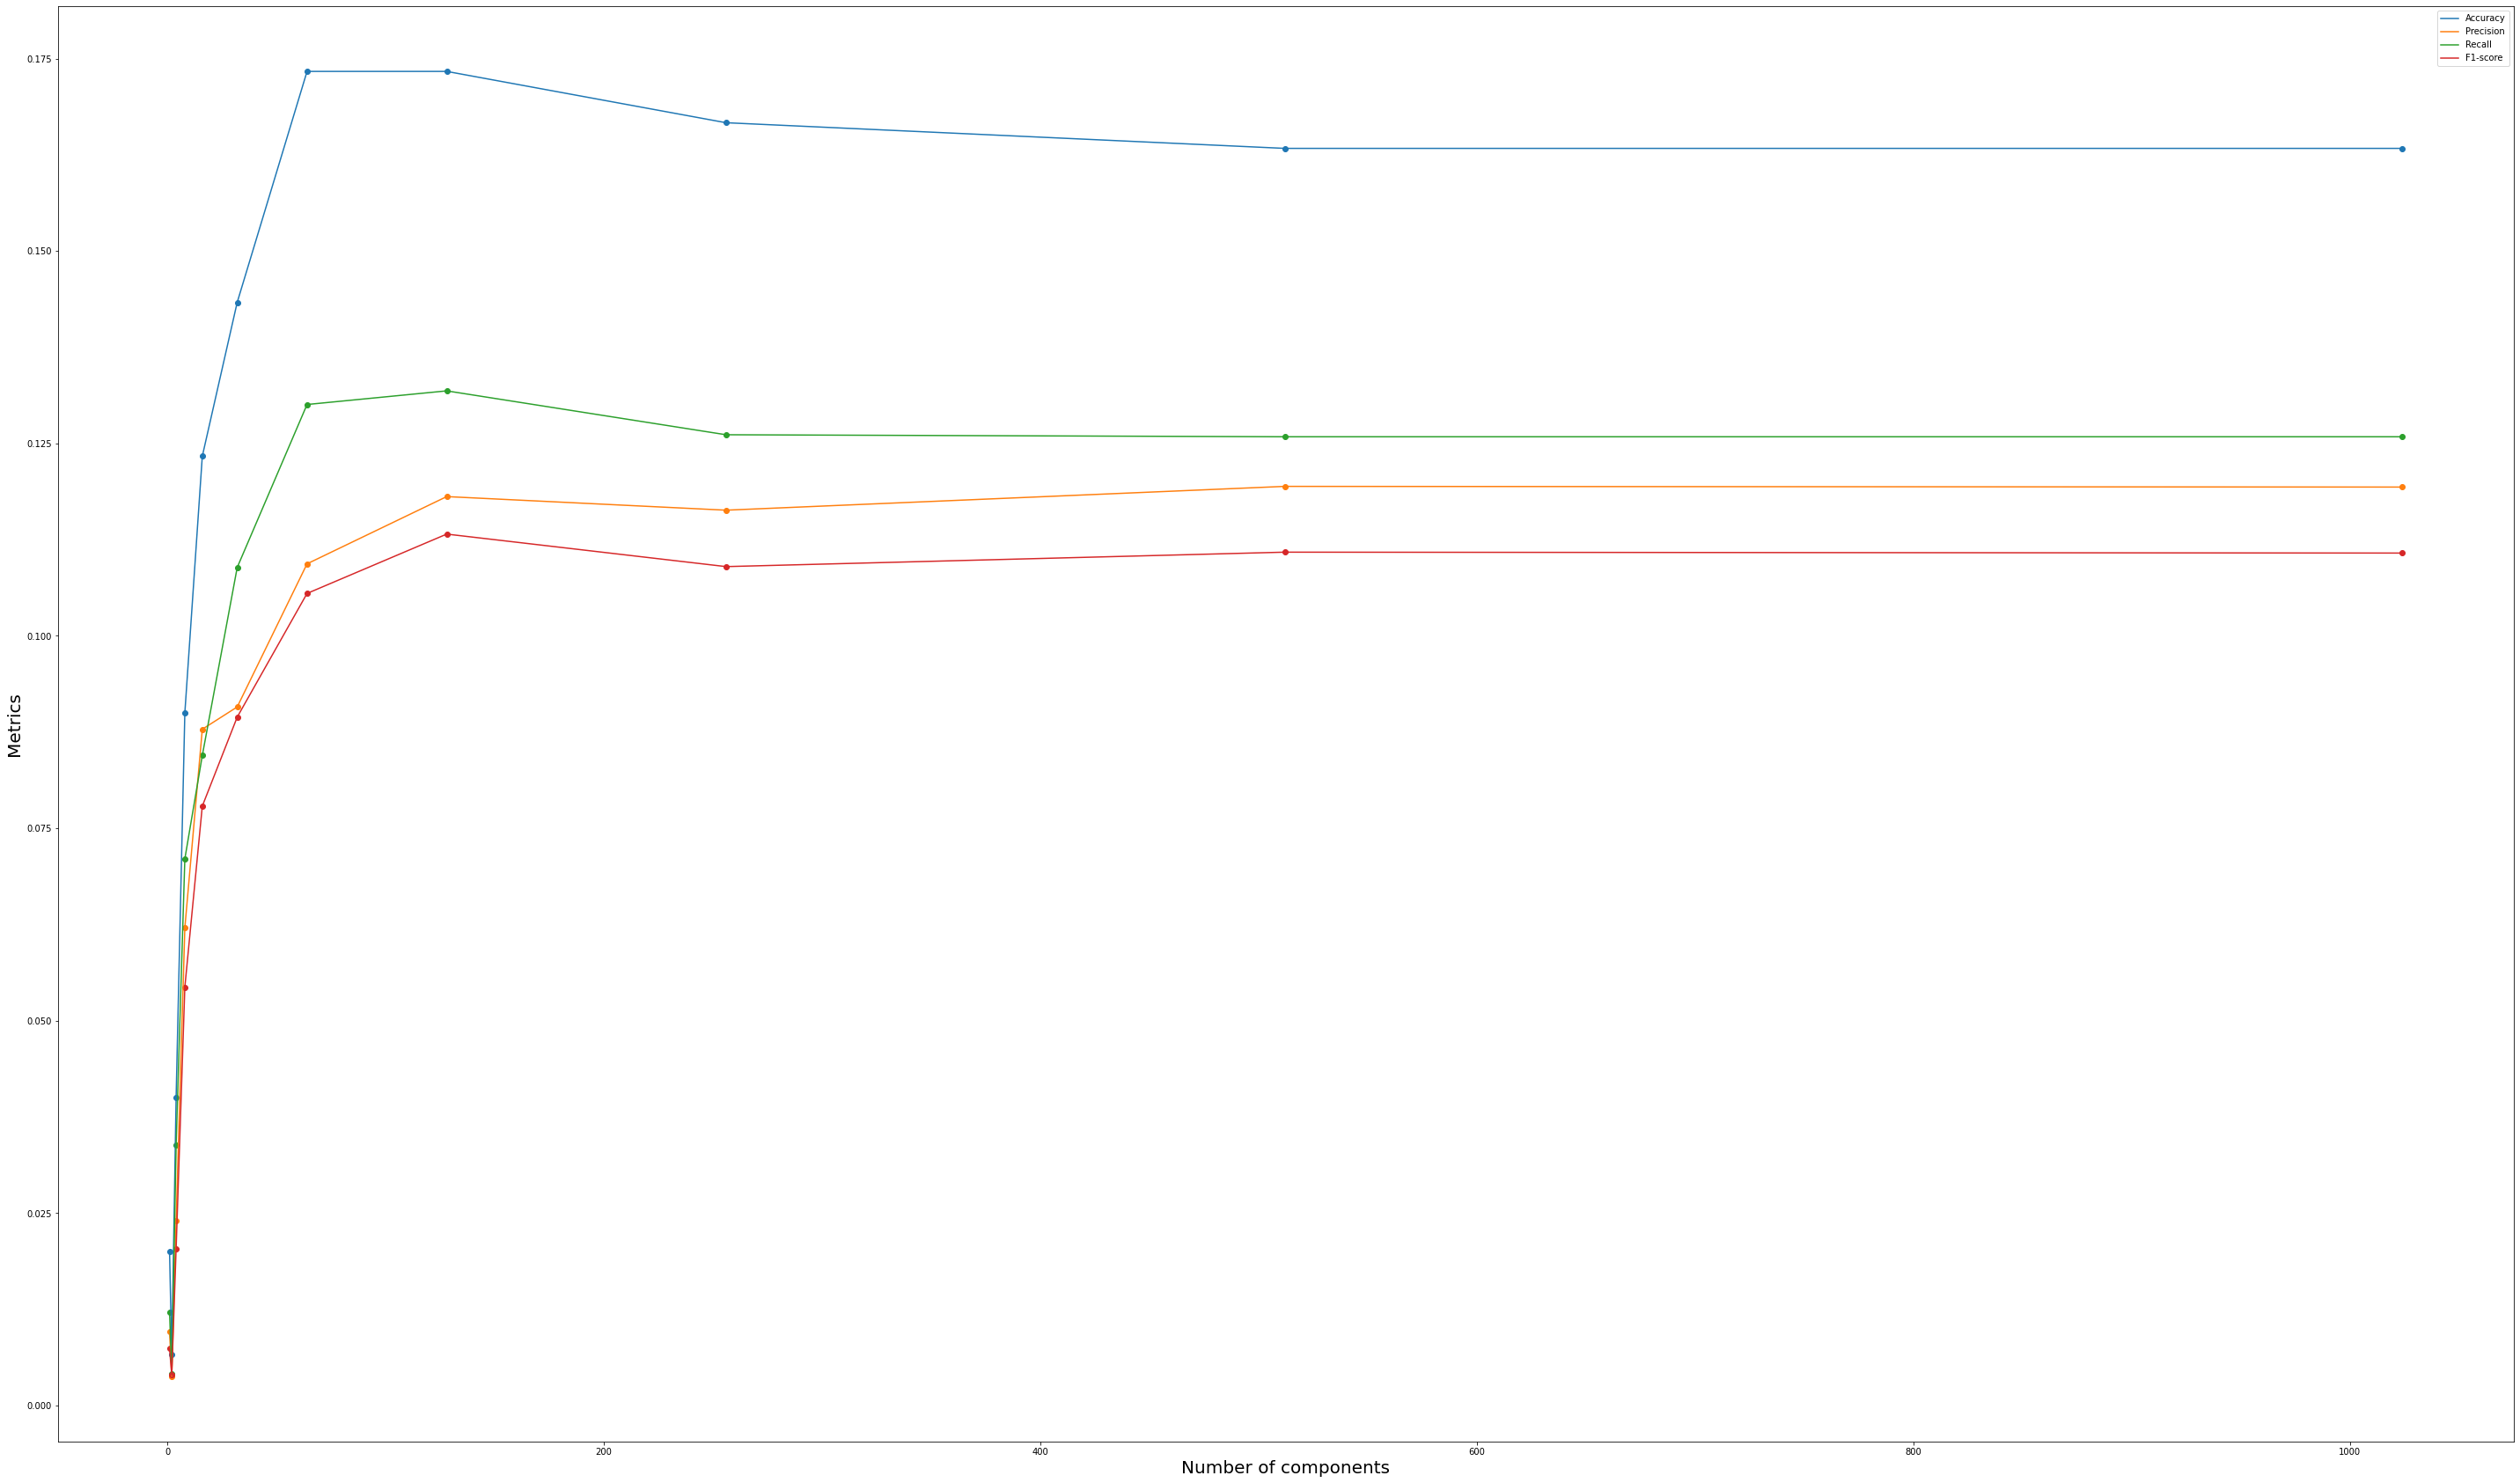

In [36]:
acc , prec, rec, f1 = custom_KNN(resnet_features, labels)
print("Metrics without PCA on resnet features:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

no_resnet_components = min(resnet_features.shape[0], resnet_features.shape[1]) # Number of components
resnet_cov = np.cov(resnet_features.T) # Calculating the covariance matrix
resnet_eig_vals, resnet_eig_vecs = np.linalg.eigh(resnet_cov) # Calculating the eigen values and eigen vectors
resnet_sorted_index = np.argsort(resnet_eig_vals)[::-1] # Sorting the eigen values in descending order
resnet_eig_vals = resnet_eig_vals[resnet_sorted_index]
resnet_eig_vecs = resnet_eig_vecs[:, resnet_sorted_index]

resnet_reduced_components = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512,1024] # List of number of components to be used for the dataset
resnet_accuracy = []
resnet_precision = []
resnet_recall = []
resnet_f1score = []

for i in resnet_reduced_components:
    t = np.dot(resnet_features, resnet_eig_vecs[:, :i])
    acc , prec, rec, f1 = custom_KNN(t, labels)
    resnet_accuracy.append(acc)
    resnet_precision.append(prec)
    resnet_recall.append(rec)
    resnet_f1score.append(f1)
    
print("\nPlotting metrics with PCA on resnet features:")
# Plotting the accuracy, precision, recall and f1-score for the ResNet features
plt.plot(resnet_reduced_components, resnet_accuracy, label='Accuracy')
plt.plot(resnet_reduced_components, resnet_precision, label='Precision')
plt.plot(resnet_reduced_components, resnet_recall, label='Recall')
plt.plot(resnet_reduced_components, resnet_f1score, label='F1-score')
plt.scatter(resnet_reduced_components, resnet_accuracy)
plt.scatter(resnet_reduced_components, resnet_precision)
plt.scatter(resnet_reduced_components, resnet_recall)
plt.scatter(resnet_reduced_components, resnet_f1score)
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.legend()
plt.rcParams["figure.figsize"] = (50,30) # increasing the size of the plot
plt.show()

Metrics without PCA on vit features:
Accuracy: 0.20666666666666667
Precision: 0.15678726035868892
Recall: 0.1569882498453927
F1-score: 0.1398015404508911

Plotting metrics with PCA on vit features:


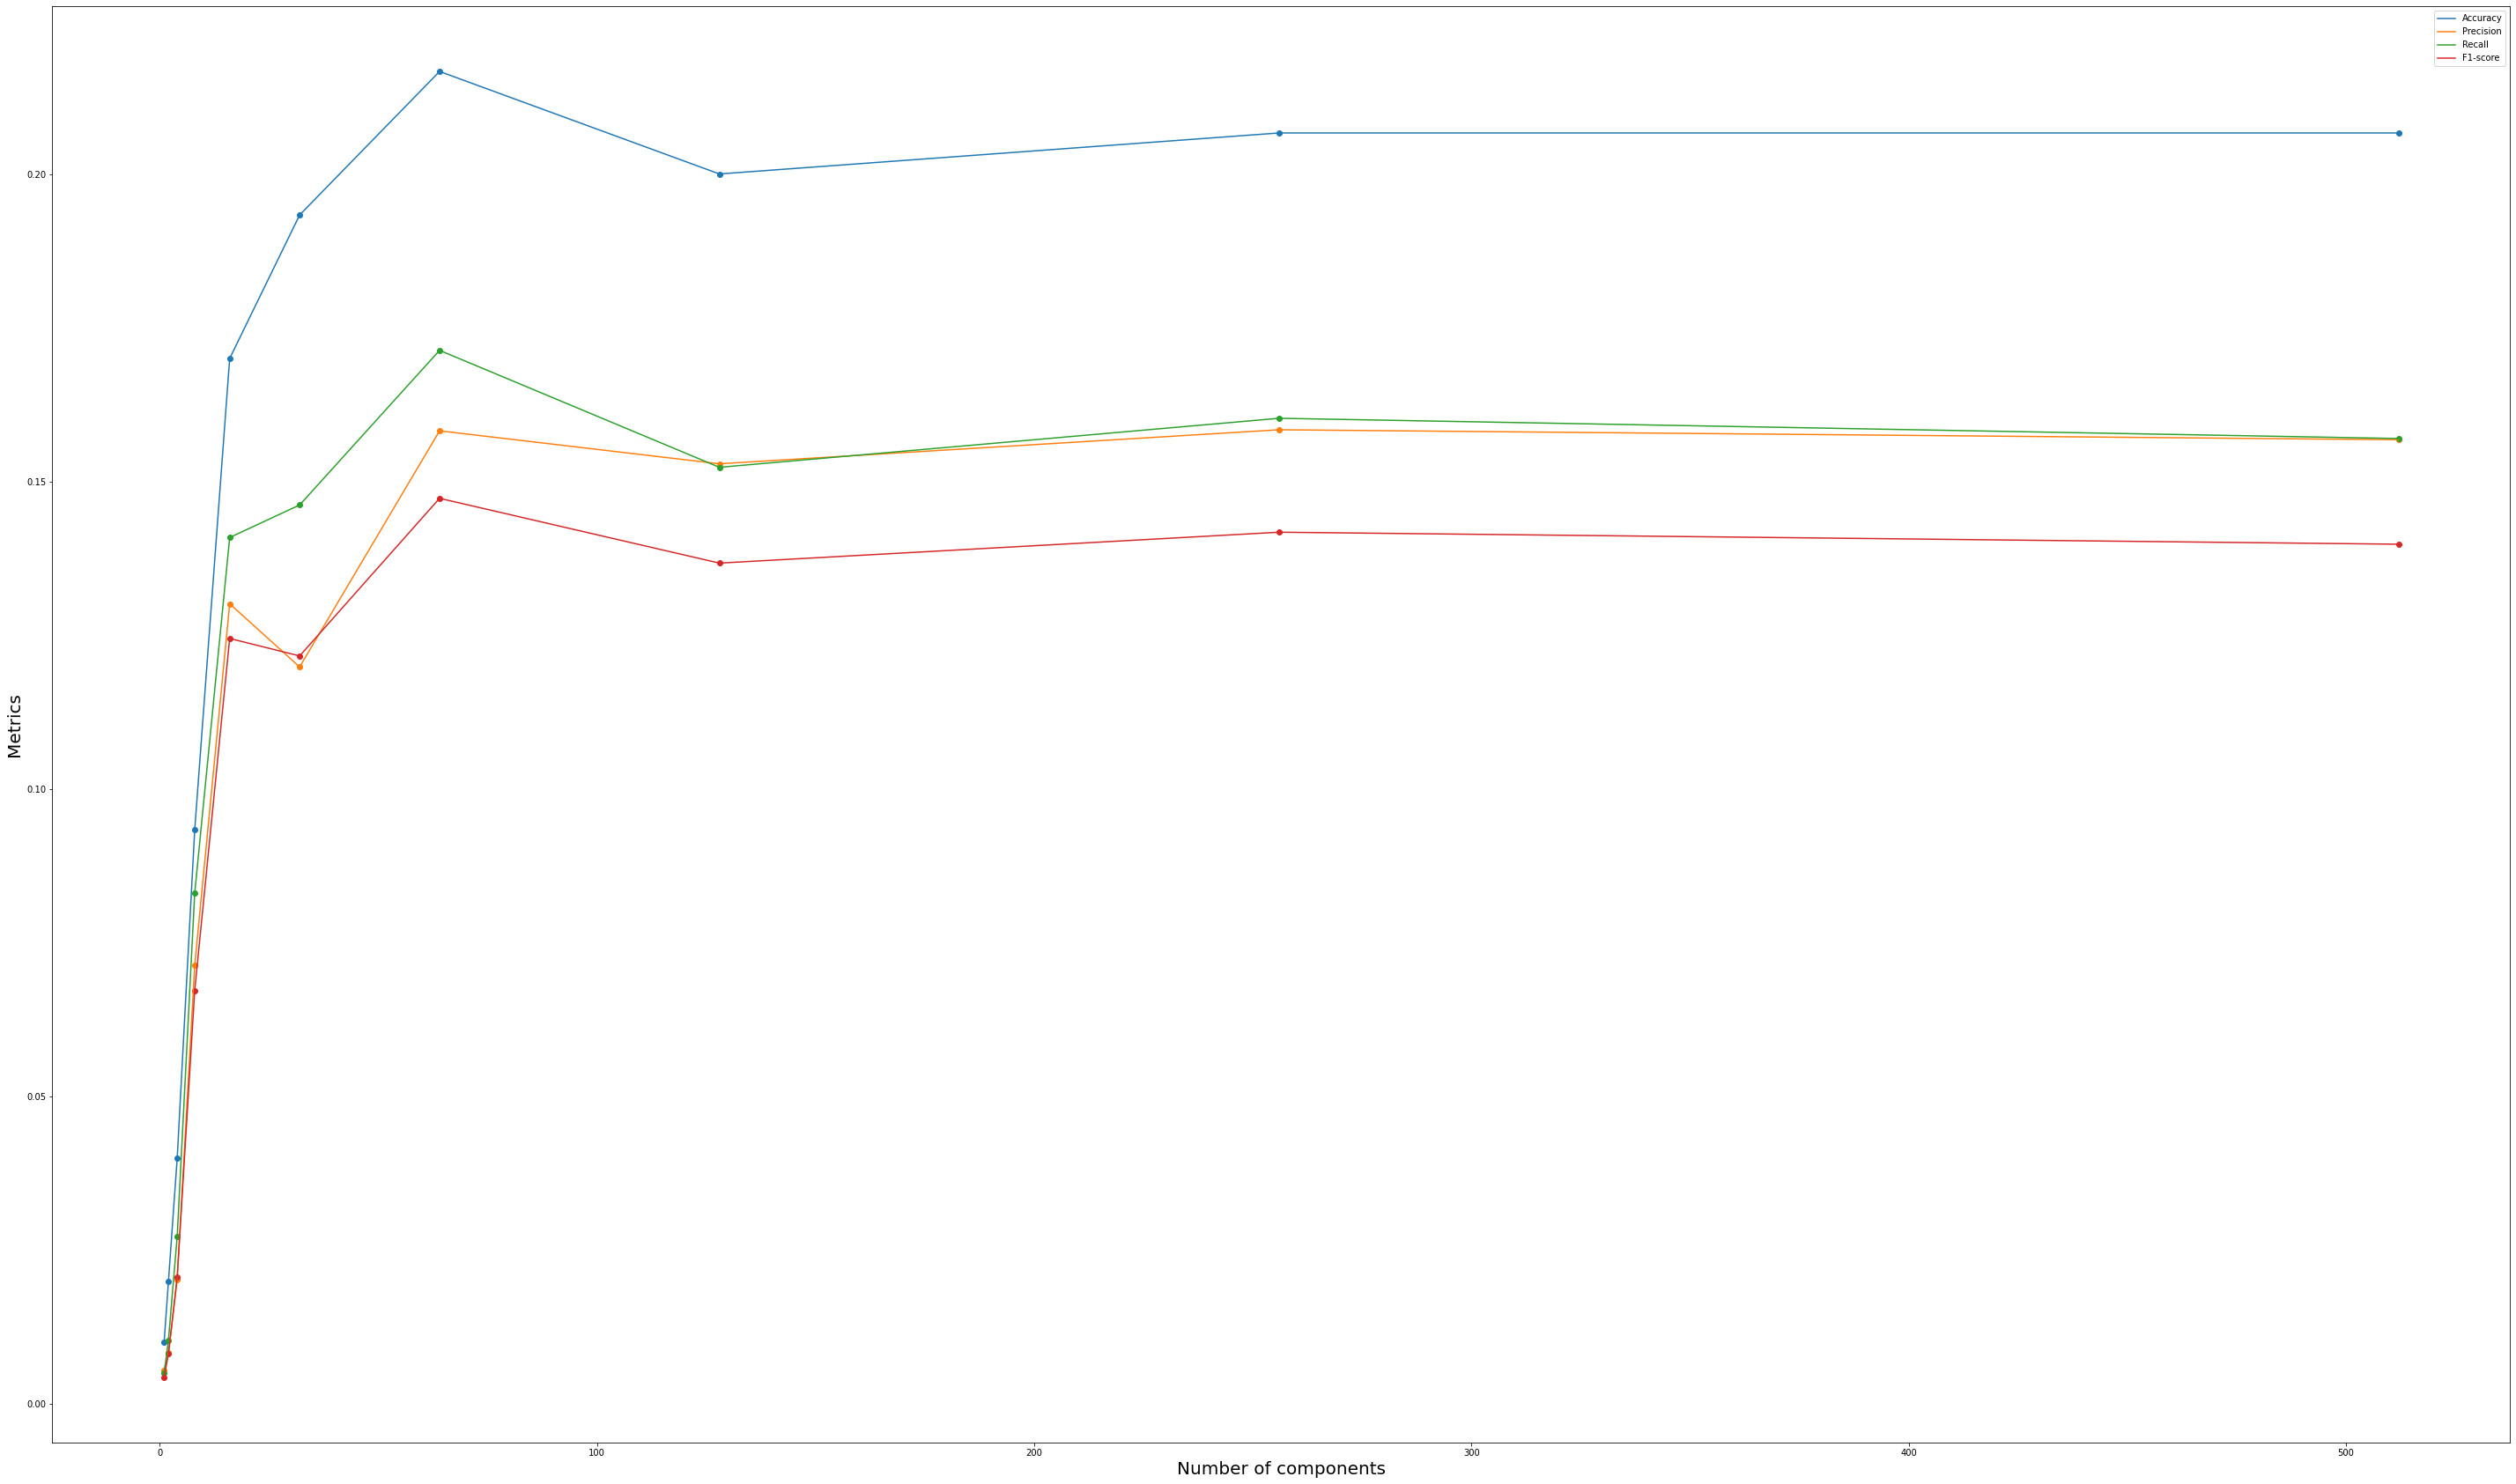

In [37]:
# vit features
acc , prec, rec, f1 = custom_KNN(vit_features, labels)
print("Metrics without PCA on vit features:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

no_vit_components = min(vit_features.shape[0], vit_features.shape[1]) # Number of components
vit_cov = np.cov(vit_features.T) # Calculating the covariance matrix
vit_eig_vals, vit_eig_vecs = np.linalg.eigh(vit_cov) # Calculating the eigen values and eigen vectors
vit_sorted_index = np.argsort(vit_eig_vals)[::-1] # Sorting the eigen values in descending order
vit_eig_vals = vit_eig_vals[vit_sorted_index]
vit_eig_vecs = vit_eig_vecs[:, vit_sorted_index]

vit_reduced_components = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512] # List of number of components to be used for the dataset
vit_accuracy = []
vit_precision = []
vit_recall = []
vit_f1score = []

for i in vit_reduced_components:
    t = np.dot(vit_features, vit_eig_vecs[:, :i])
    acc , prec, rec, f1 = custom_KNN(t, labels)
    vit_accuracy.append(acc)
    vit_precision.append(prec)
    vit_recall.append(rec)
    vit_f1score.append(f1)

print("\nPlotting metrics with PCA on vit features:")
# Plotting the accuracy, precision, recall and f1-score for the vit features
plt.plot(vit_reduced_components, vit_accuracy, label='Accuracy')
plt.plot(vit_reduced_components, vit_precision, label='Precision')
plt.plot(vit_reduced_components, vit_recall, label='Recall')
plt.plot(vit_reduced_components, vit_f1score, label='F1-score')
plt.scatter(vit_reduced_components, vit_accuracy)
plt.scatter(vit_reduced_components, vit_precision)
plt.scatter(vit_reduced_components, vit_recall)
plt.scatter(vit_reduced_components, vit_f1score)
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.legend()
plt.rcParams["figure.figsize"] = (50,30) # increasing the size of the plot
plt.show()


# 1.1 Part D

Metrics without PCA on CFW dataset:
Accuracy: 0.31851851851851853
Precision: 0.5025075414781297
Recall: 0.34438226247436776
F1-score: 0.31905594798932857

Plotting metrics with PCA on CFW dataset:


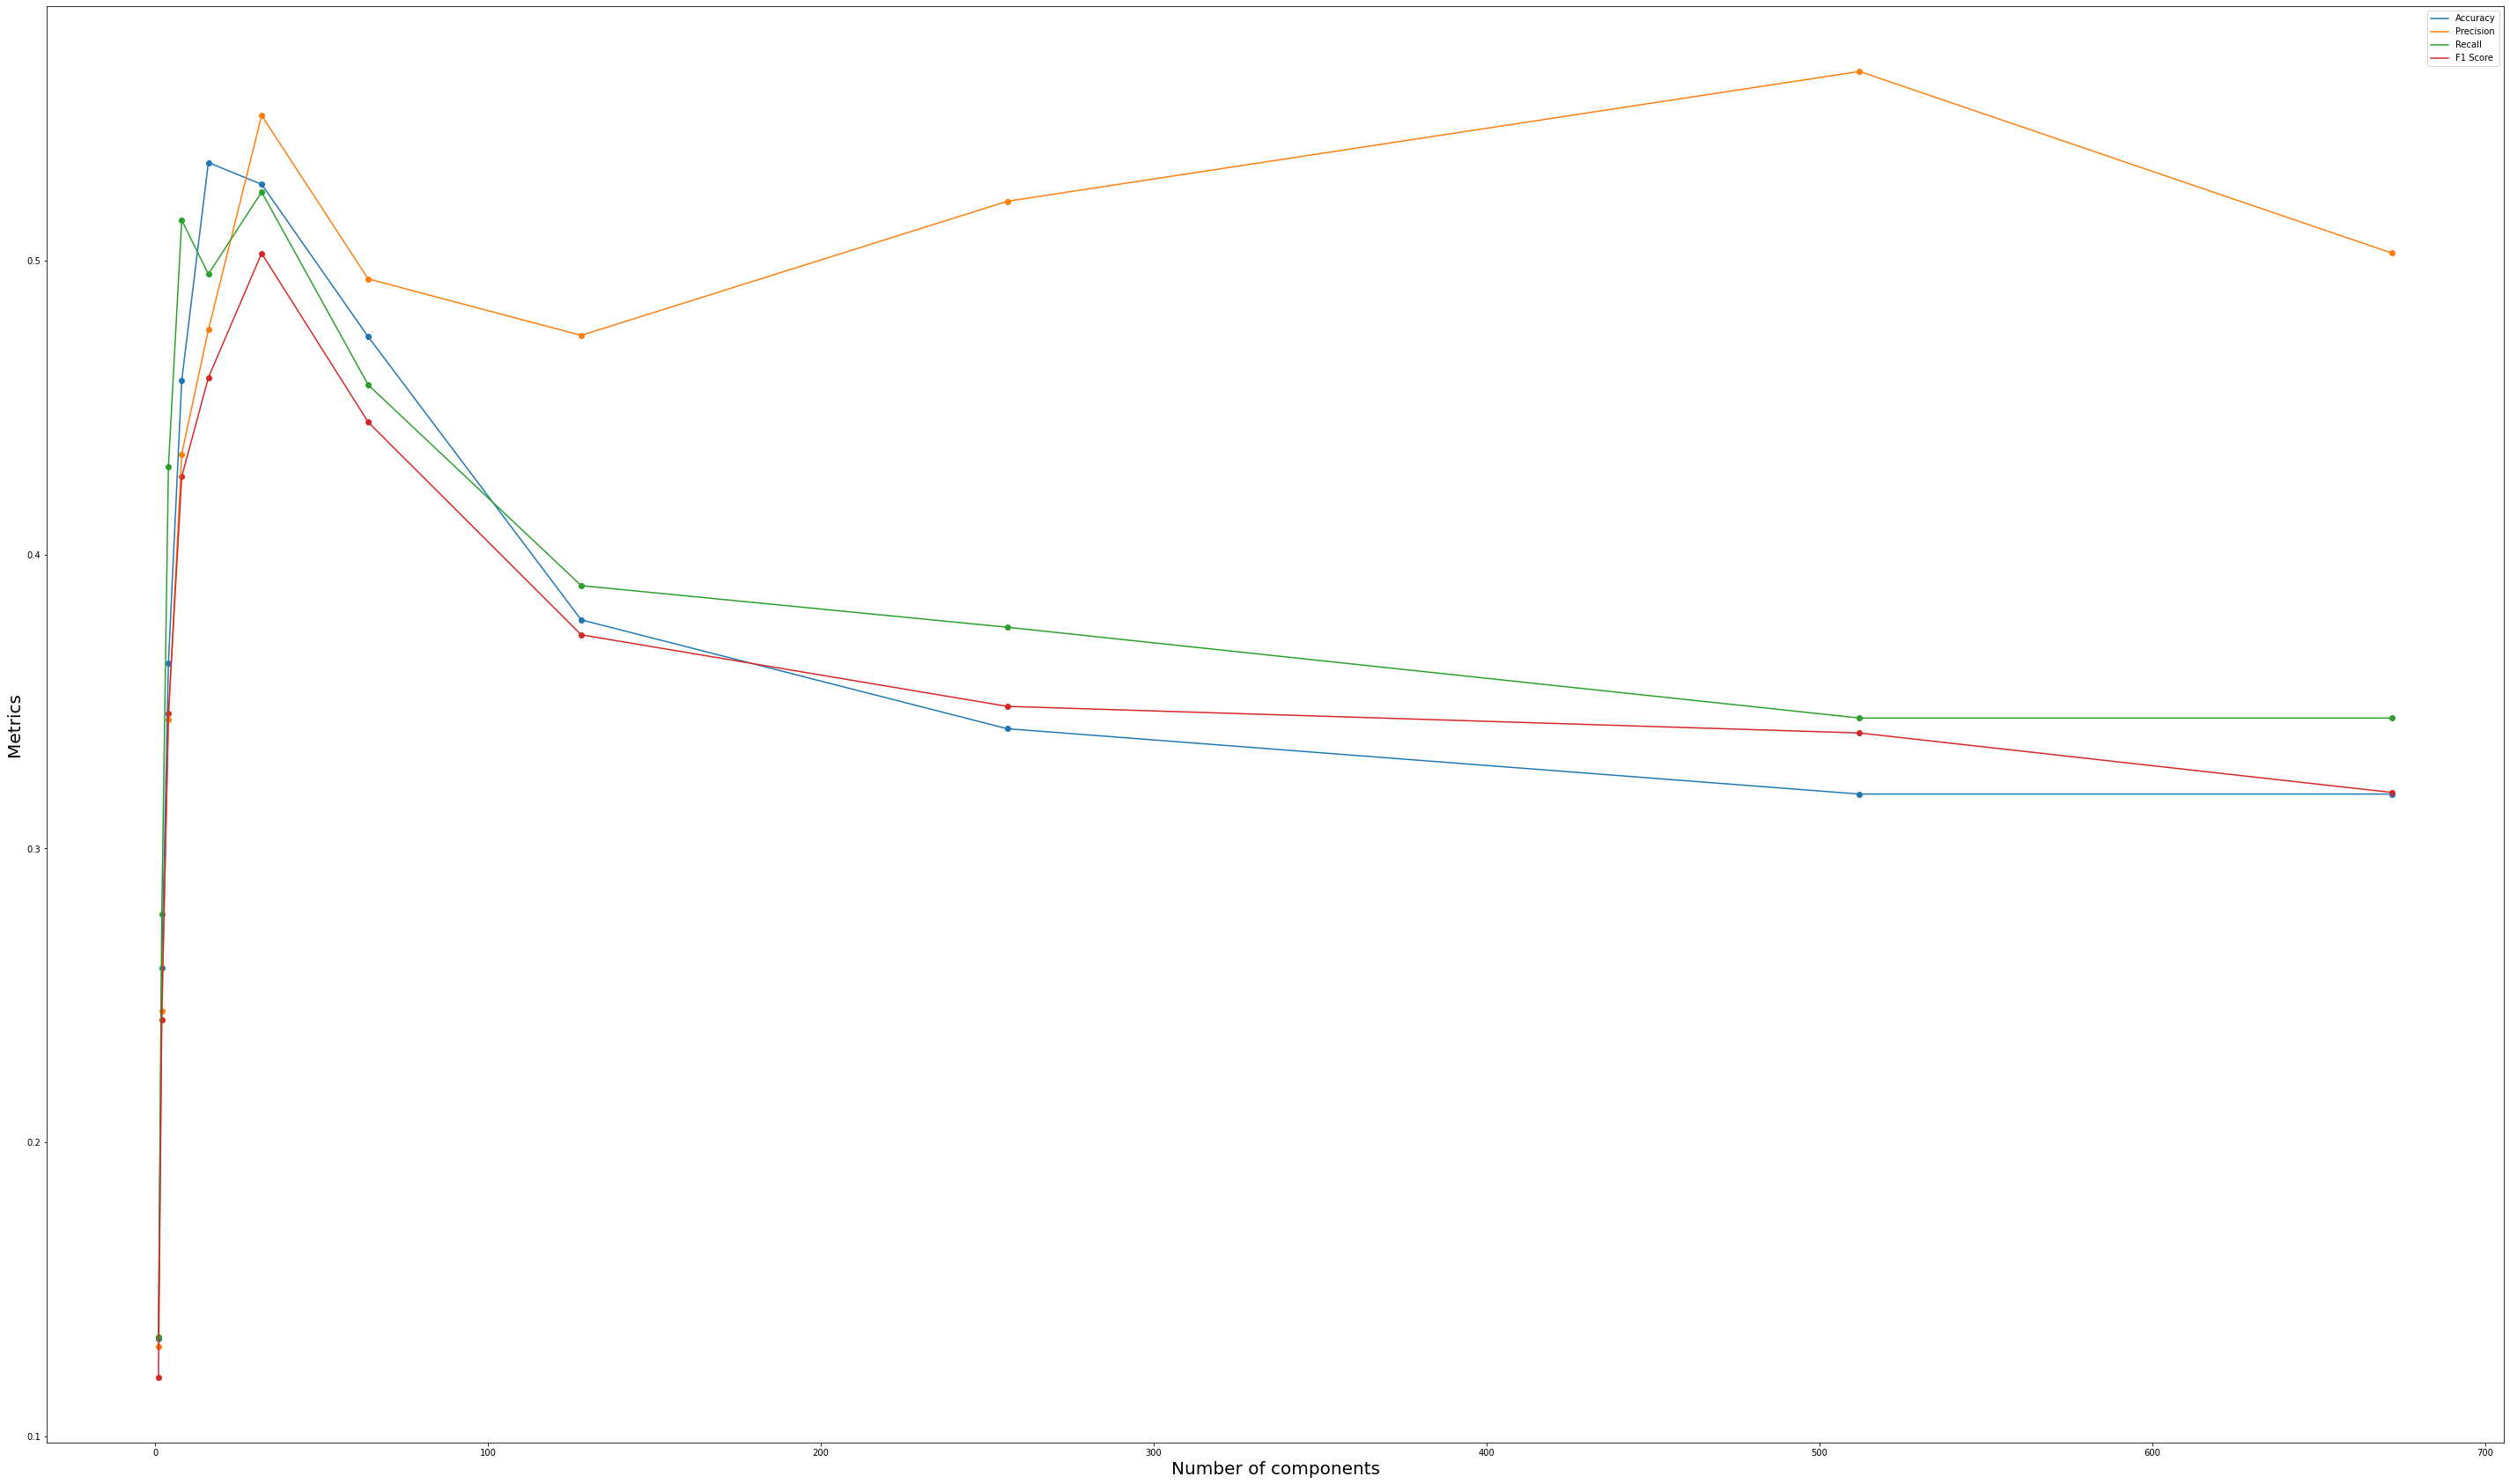

In [38]:
# we had already varied and stored the pca matrix in X_reduced_components in 1.1 Part A

# Running the KNN classifier on the dataset
acc , prec, rec, f1 = custom_KNN(X_reshaped, y)
print("Metrics without PCA on CFW dataset:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

acc = []
prec = []
rec = []
f1 = []
range_reduced = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 672]

for i in range_reduced:
    t = X_reduced_components[i-1]
    acc1 , prec1, rec1, f11 = custom_KNN(t, y)
    acc.append(acc1)
    prec.append(prec1)
    rec.append(rec1)
    f1.append(f11)

print("\nPlotting metrics with PCA on CFW dataset:")
# Plotting the accuracy, precision, recall and f1-score for the CFW dataset
plt.plot(range_reduced, acc, label='Accuracy')
plt.plot(range_reduced, prec, label='Precision')
plt.plot(range_reduced, rec, label='Recall')
plt.plot(range_reduced, f1, label='F1 Score')
plt.scatter(range_reduced, acc)
plt.scatter(range_reduced, prec)
plt.scatter(range_reduced, rec)
plt.scatter(range_reduced, f1)
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.legend()
plt.rcParams["figure.figsize"] = (50,30) # increasing the size of the plot
plt.show()

# Part 1.2

In [39]:
# reading csv files

drawer_csv = pd.read_csv('./drawer_attributes.csv')
guesser_csv = pd.read_csv('./guesser_attributes.csv')

drawer_csv_X = drawer_csv.iloc[:, 1:].values
guesser_csv_X = guesser_csv.iloc[:, 1:].values

In [45]:
# PCA for drawer attributes
no_drawer_components = min(drawer_csv_X.shape[0], drawer_csv_X.shape[1]) # Number of components
drawer_csv_X_reshaped = drawer_csv_X.T
drawer_cov = np.cov(drawer_csv_X_reshaped) # Calculating the covariance matrix
drawer_eig_vals, drawer_eig_vecs = np.linalg.eigh(drawer_cov) # Calculating the eigen values and eigen vectors
drawer_sorted_index = np.argsort(drawer_eig_vals)[::-1] # Sorting the eigen values in descending order
drawer_eig_vals = drawer_eig_vals[drawer_sorted_index]
drawer_eig_vecs = drawer_eig_vecs[:, drawer_sorted_index]

drawer_pca_matrix = drawer_eig_vecs[:, :no_drawer_components] # The last element of drawer_reduced_components contains the drawer_csv_X reduced to the minimum number of dimesions without losing any information.


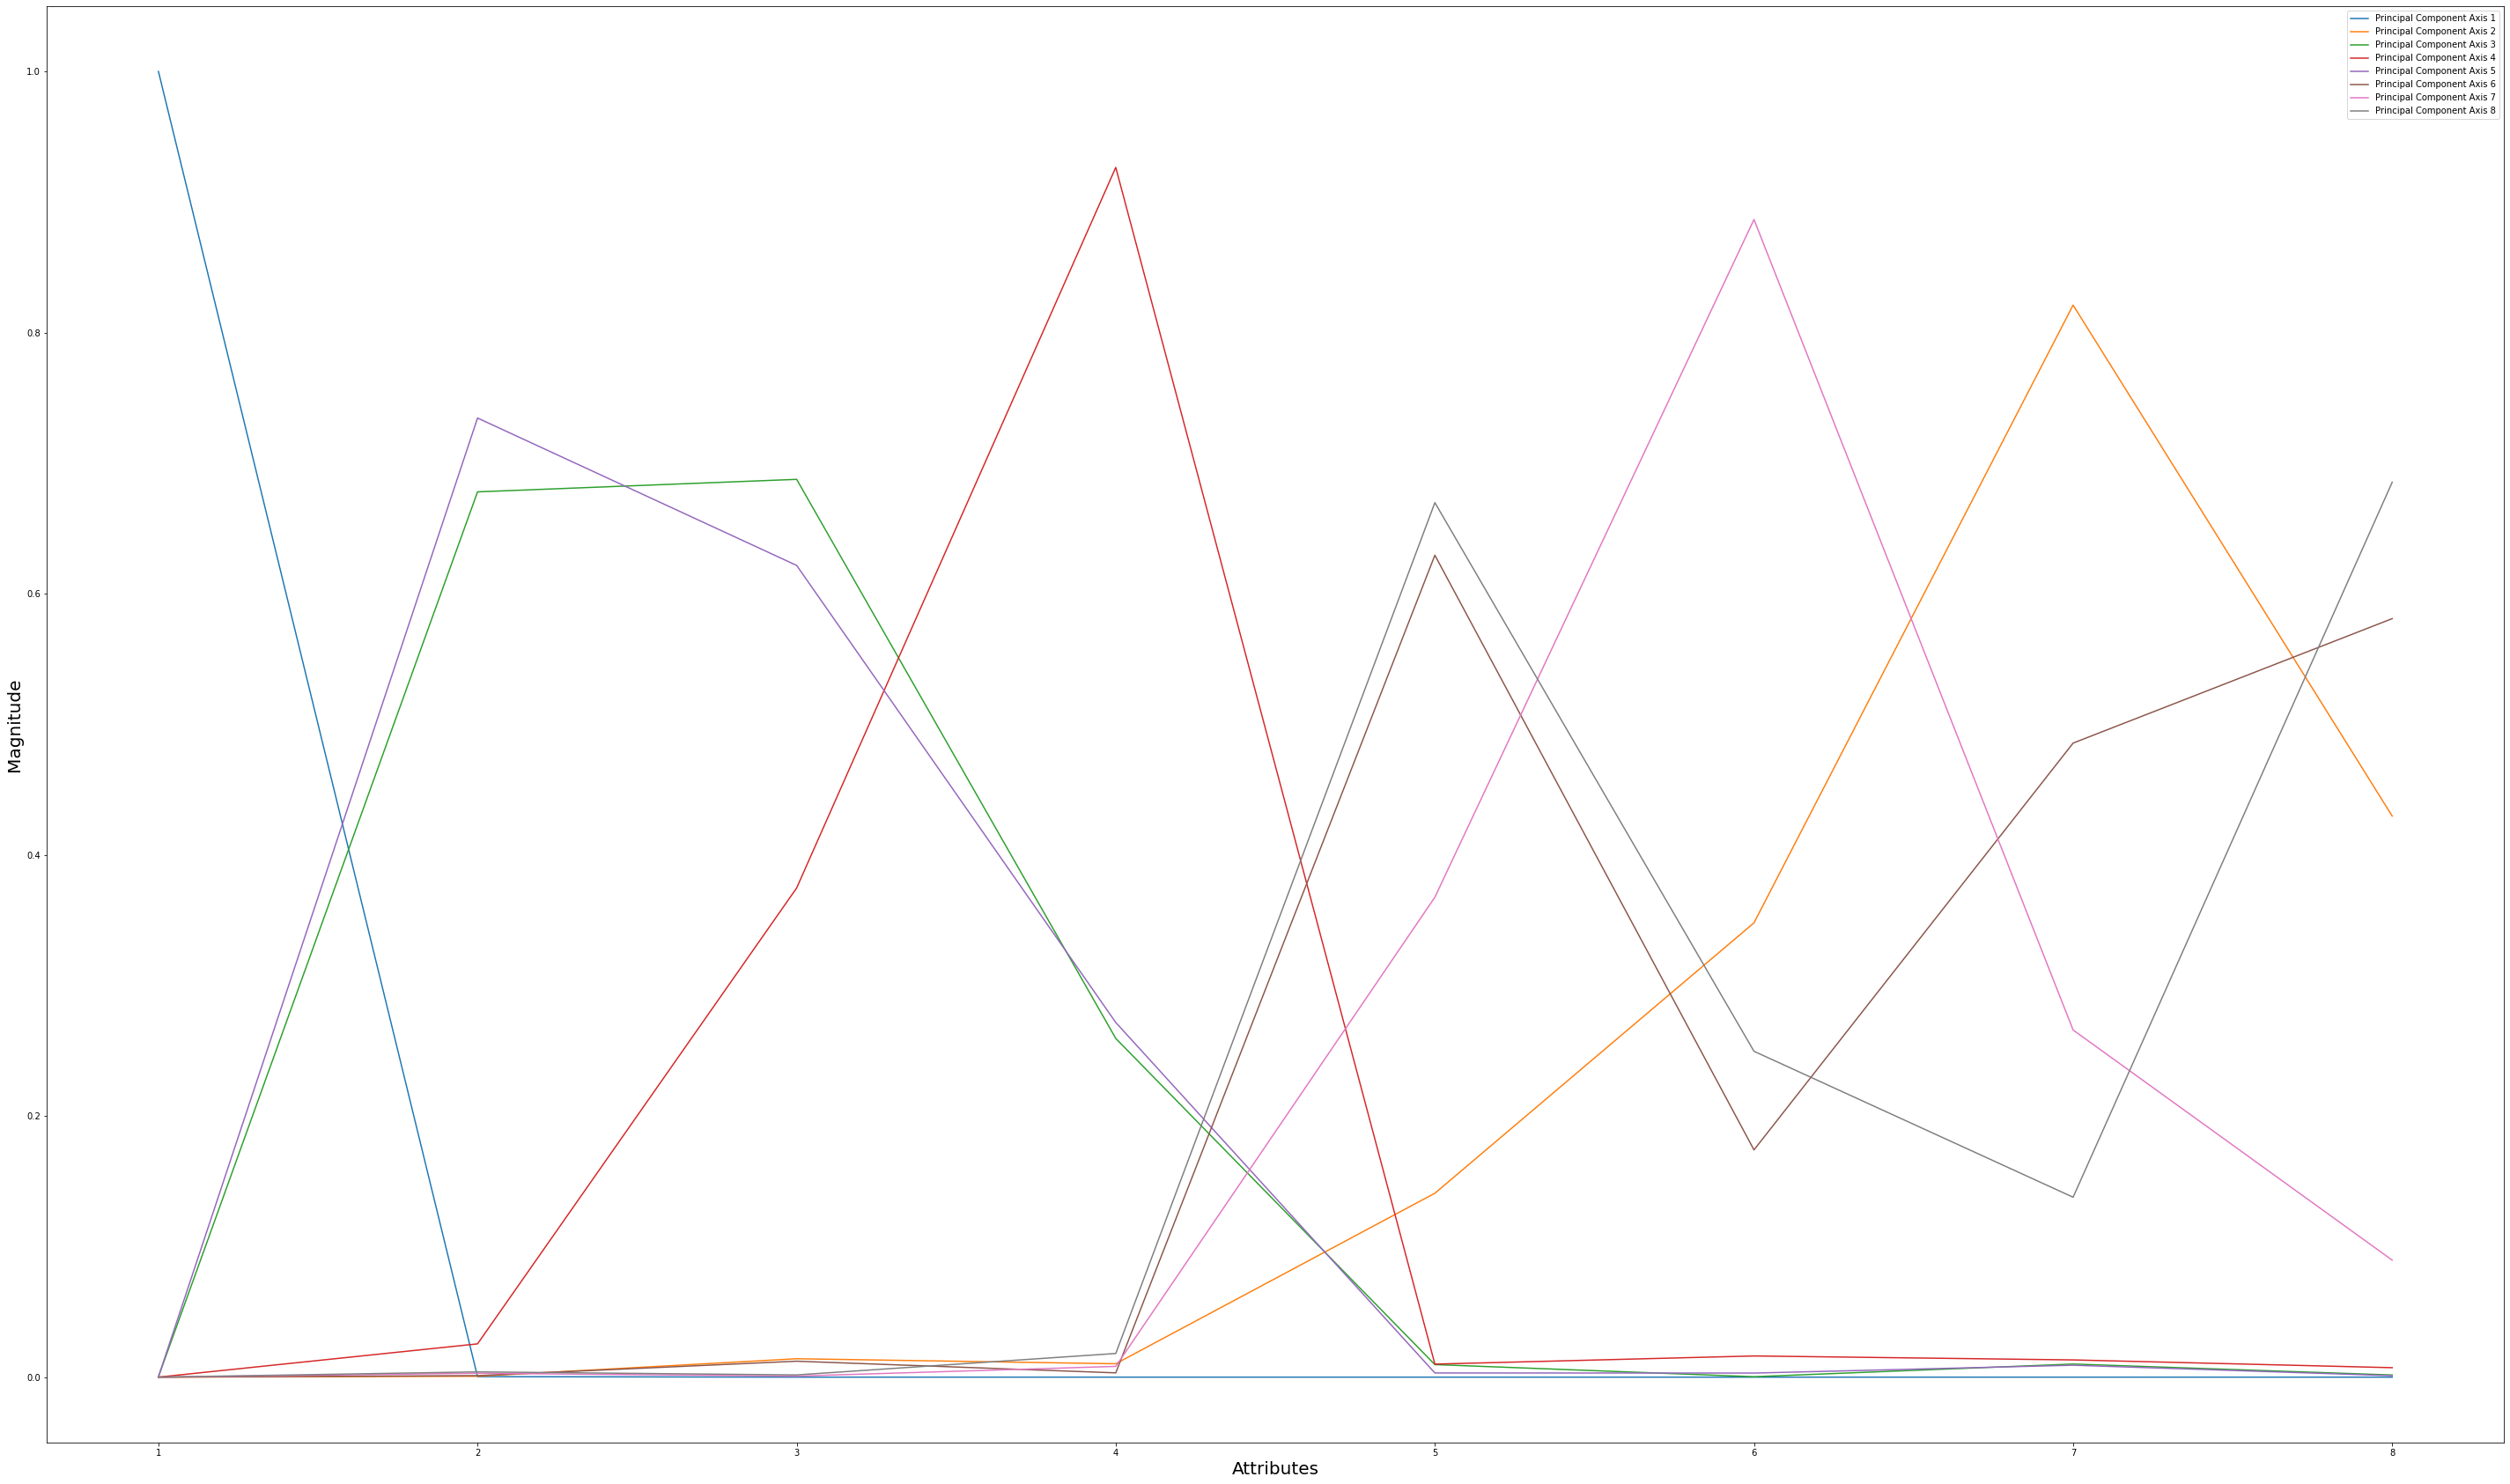

In [51]:
x = np.arange(1, no_drawer_components+1)
for i in range(1 , no_drawer_components+1):
    plt.plot(x, abs(drawer_pca_matrix[i-1]), label='Principal Component Axis {}'.format(i))
    plt.xlabel('Attributes', fontsize=20)
    plt.ylabel('Magnitude', fontsize=20)
    plt.legend()
    plt.rcParams["figure.figsize"] = (50,30) # increasing the size of the plot
plt.show()
    

        

## Observations:

### First axis is for Area of canvas
### Second and third axis tell about stroke frequency and range
### Fourth and Fifth tell about the stroke timinggs
### Sixth, Seventh and Eighth tell about the thumbs up, down and highlight

### Principal components 1 and 4 are high values, thus more important

In [52]:
# for guesser attributes
no_guesser_components = min(guesser_csv_X.shape[0], guesser_csv_X.shape[1]) # Number of components
guesser_csv_X_reshaped = guesser_csv_X.T
guesser_cov = np.cov(guesser_csv_X_reshaped) # Calculating the covariance matrix
guesser_eig_vals, guesser_eig_vecs = np.linalg.eigh(guesser_cov) # Calculating the eigen values and eigen vectors
guesser_sorted_index = np.argsort(guesser_eig_vals)[::-1] # Sorting the eigen values in descending order
guesser_eig_vals = guesser_eig_vals[guesser_sorted_index]
guesser_eig_vecs = guesser_eig_vecs[:, guesser_sorted_index]

guesser_pca_matrix = guesser_eig_vecs[:, :no_guesser_components] # The last element of guesser_reduced_components contains the guesser_csv_X reduced to the minimum number of dimesions without losing any information.


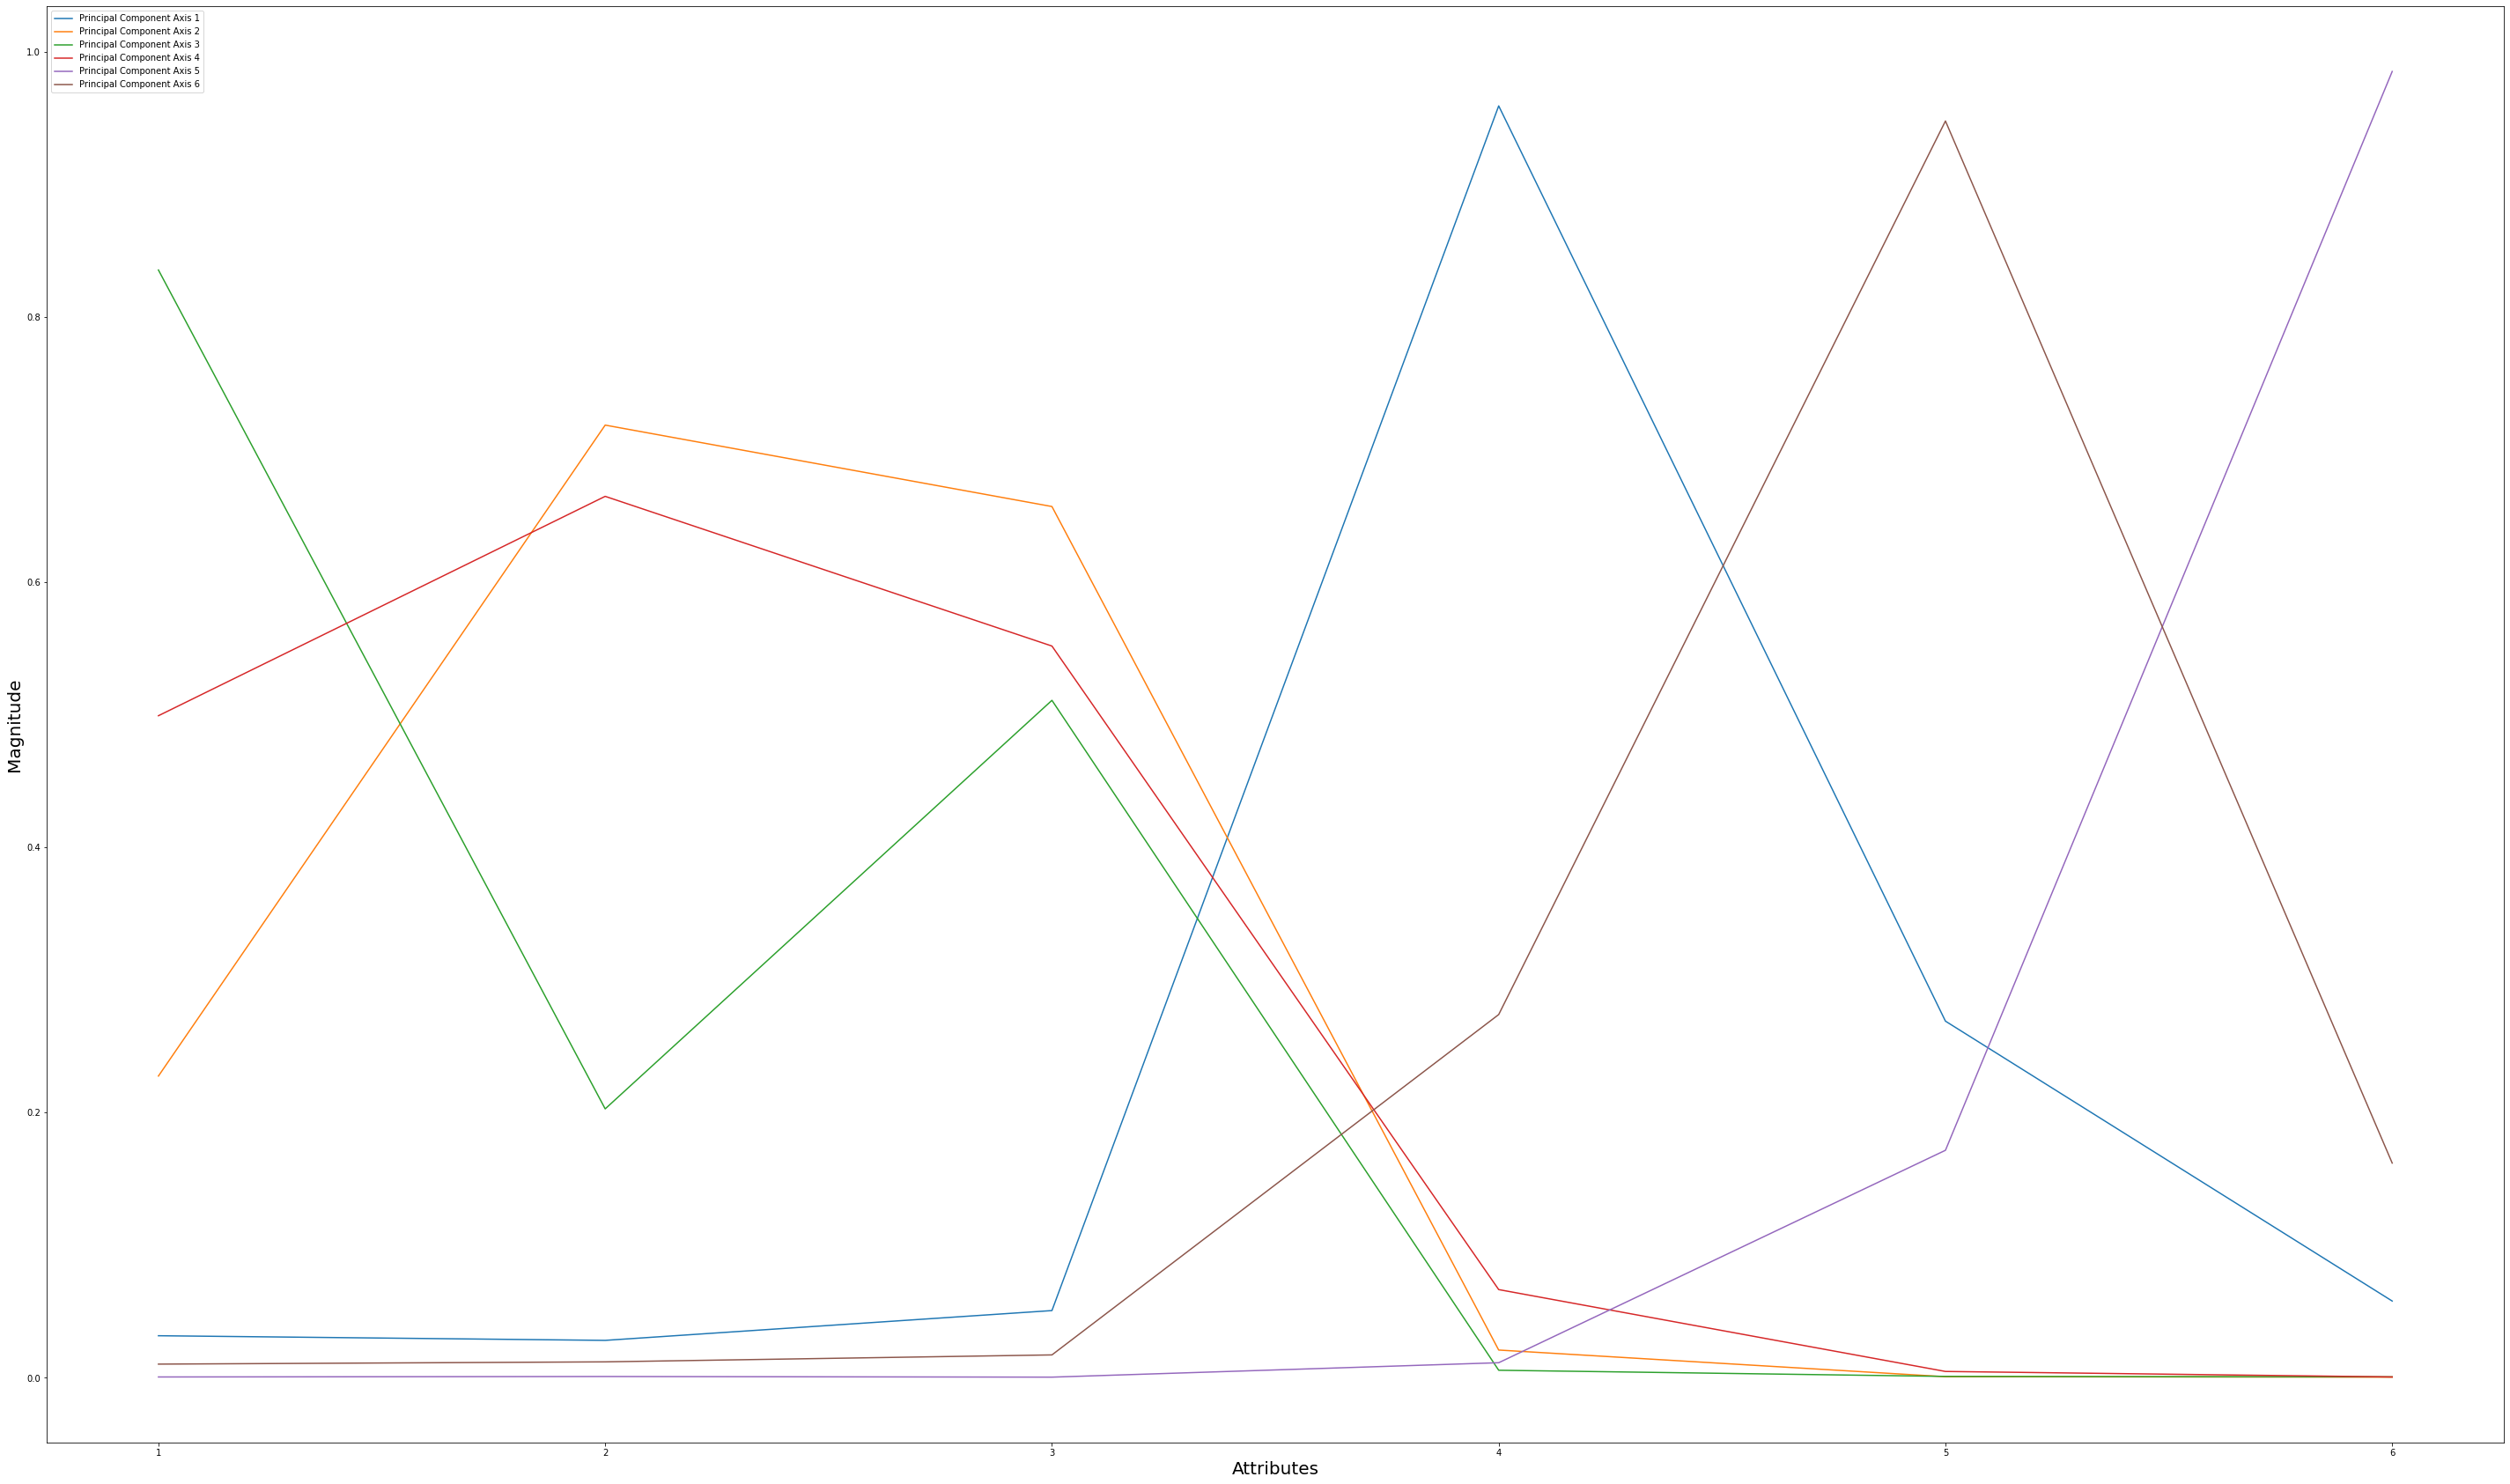

In [54]:
x = np.arange(1, no_guesser_components+1)
for i in range(1 , no_guesser_components+1):
    plt.plot(x, abs(guesser_pca_matrix[i-1]), label='Principal Component Axis {}'.format(i))
    plt.xlabel('Attributes', fontsize=20)
    plt.ylabel('Magnitude', fontsize=20)
    plt.legend()
    plt.rcParams["figure.figsize"] = (50,30) # increasing the size of the plot
plt.show()

## Observations:

### First axis is for number of messages
### Second axis is for first message
### Third axis is for last message
### Fourth axis is for range of messages
### Fifth axis is for confusion
### Sixth axis is for entropy

### Principal components 1 is of high value, thus more important